# Mall customers dataset

In [53]:
# Import the libraries
import numpy as np
import pandas as pd
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
from sklearn.cluster import KMeans #KMeans clustering Library

In [55]:
cust= pd.read_csv("C://Users//AMIT YADAV//Downloads//UNSUPERVISED LEARNING//datasets////Mall Customers.csv")

In [56]:
cust.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [57]:
cust1=cust.drop(['CustomerID','Genre','Age'],axis=1)  #here we are dropping the categorical columns because clustering cannot happen in categorical column

In [58]:
cust1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# APPLYING KMEANS CLUSTERING

In [59]:
#ELBOW PLOT METHOD
#THIS METHOD IS USED TO DETERMINE THE OPTIMAL VALUE OF CLUSTERS

In [60]:
# first of all finding no. of clusters by elbow method:-

In [61]:
#first we have to find wcss 
wcss=[]
for i in range(1,10):#loop will run 1 to 10 times
    k=KMeans(n_clusters=i)#defined the K
    k.fit_predict(cust1)
    wcss.append(k.inertia_)

In [62]:
wcss

[269981.28,
 182440.3076298701,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37239.83554245604,
 30259.65720728547,
 25062.382236661244,
 21794.8856090982]

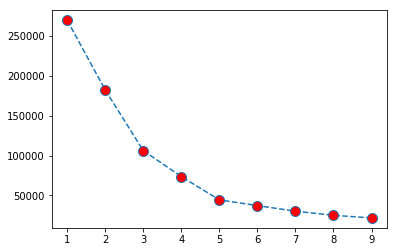

In [63]:
plt.plot(range(1,10),wcss, '-o',linestyle='dashed',markerfacecolor='red',markersize=10)  #-o represents line type
#so from plot we get optimal value of clusters =5

In [64]:
k=KMeans(n_clusters=5) #here taken no of clusters as 5- its proof is in plot which is come by using the elbow method

In [65]:
#since the fit and predict will apply on the whole data here
labels=k.fit_predict(cust1) #fitting the kmeans clustering on the data

In [66]:
labels

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [67]:
#discuss the k...

# finding centroid  values
k.cluster_centers_  #here we get 12 centroid  values.how-written in copy
#so cluster_centers_ are called centroid values

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636]])

In [68]:
centroid=k.cluster_centers_

In [69]:
centroid

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636]])

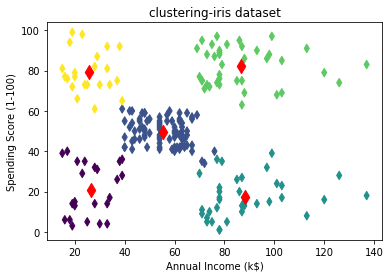

In [70]:
#making plot between Annual Income (k$) and Spending Score (1-100)
# Import the Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# this code ensures that all the plots are printed
plt.scatter(cust1['Annual Income (k$)'], cust1['Spending Score (1-100)'],marker='d', c = labels,) #here c=color of labels
plt.xlabel("Annual Income (k$)")# labeling the X Axis Values
plt.ylabel("Spending Score (1-100)") #labeling the Y axis values
plt.title('clustering-iris dataset')
plt.scatter(centroid[:,0],centroid[:,1], marker = 'd', s=100,c='red' ) #here s=size,c=color, d= diamond

In [71]:
#inference drawn from above graph
#the people who have less income spend more-risky people
#the people who have less income spend less-careful spenders people
#the people who have avg income spend avg-middle class people
#the people who have high income spend high-rich people
#the people who have high income spend less-
#here yellow people ko hum hamara product sell kar sakte h-as they have high income but less spendings-so no chance of default

In [72]:
# now finding no. of clusters by elbow method:-

# ELBOW PLOT METHOD
THIS METHOD IS USED TO DETERMINE THE OPTIMAL VALUE OF CLUSTERS

In [73]:
k.inertia_ #this is called WCSS in reality

44448.45544793371

In [74]:
wcss=[]
for i in range(1,10):#loop will run 1 to 10 times
    k=KMeans(n_clusters=i)#defined the K
    k.fit_predict(cust1)
    wcss.append(k.inertia_)

In [75]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30241.34361793659,
 25022.485004530354,
 21850.165282585633]

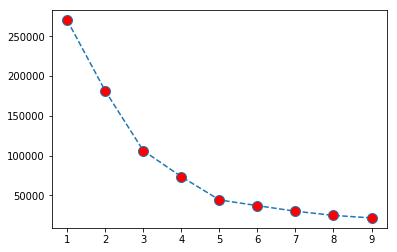

In [76]:
plt.plot(range(1,10),wcss, '-o',linestyle='dashed',markerfacecolor='red',markersize=10)  #-o represents line type
#so from plot we get optimal value of clusters =5